In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("police_project.csv")

In [8]:
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [10]:
df['driver_gender'].value_counts()

driver_gender
M    62895
F    23511
Name: count, dtype: int64

In [11]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [12]:
df.drop(columns='county_name',axis=1,inplace=True)

In [13]:
df

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


<Axes: xlabel='driver_gender', ylabel='count'>

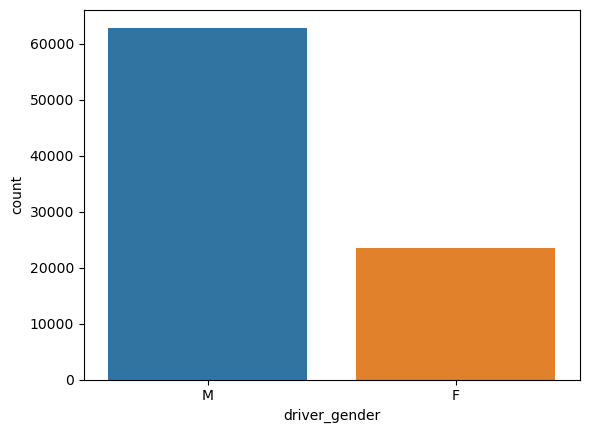

In [14]:
sns.countplot(x='driver_gender',data=df)

In [15]:
df[df['violation']=='Speeding']['driver_gender'].value_counts()

driver_gender
M    32979
F    15482
Name: count, dtype: int64

<Axes: xlabel='driver_gender'>

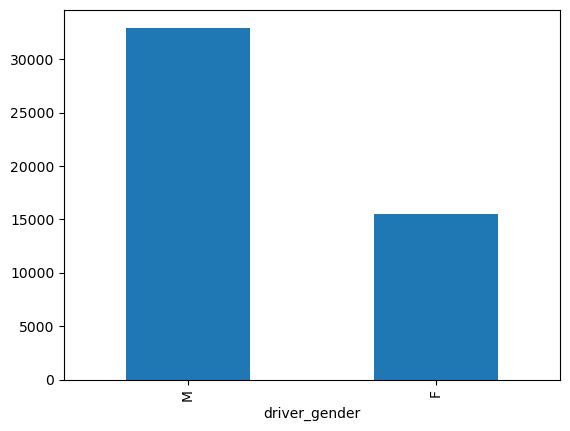

In [16]:
df[df['violation']=='Speeding']['driver_gender'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='violation'>

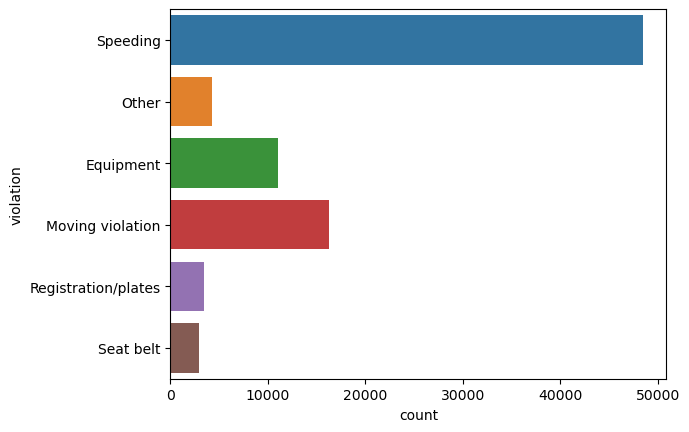

In [17]:
sns.countplot(y='violation',data=df)

<Axes: xlabel='count', ylabel='violation'>

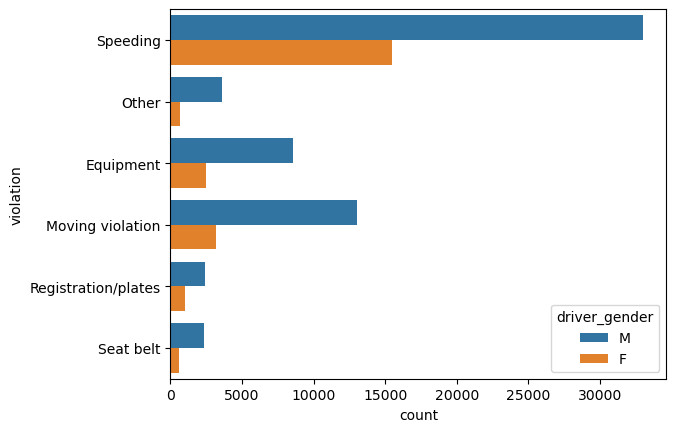

In [22]:
sns.countplot(y='violation',data=df,hue='driver_gender')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Speeding'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Equipment'),
  Text(3, 0, 'Moving violation'),
  Text(4, 0, 'Registration/plates'),
  Text(5, 0, 'Seat belt')])

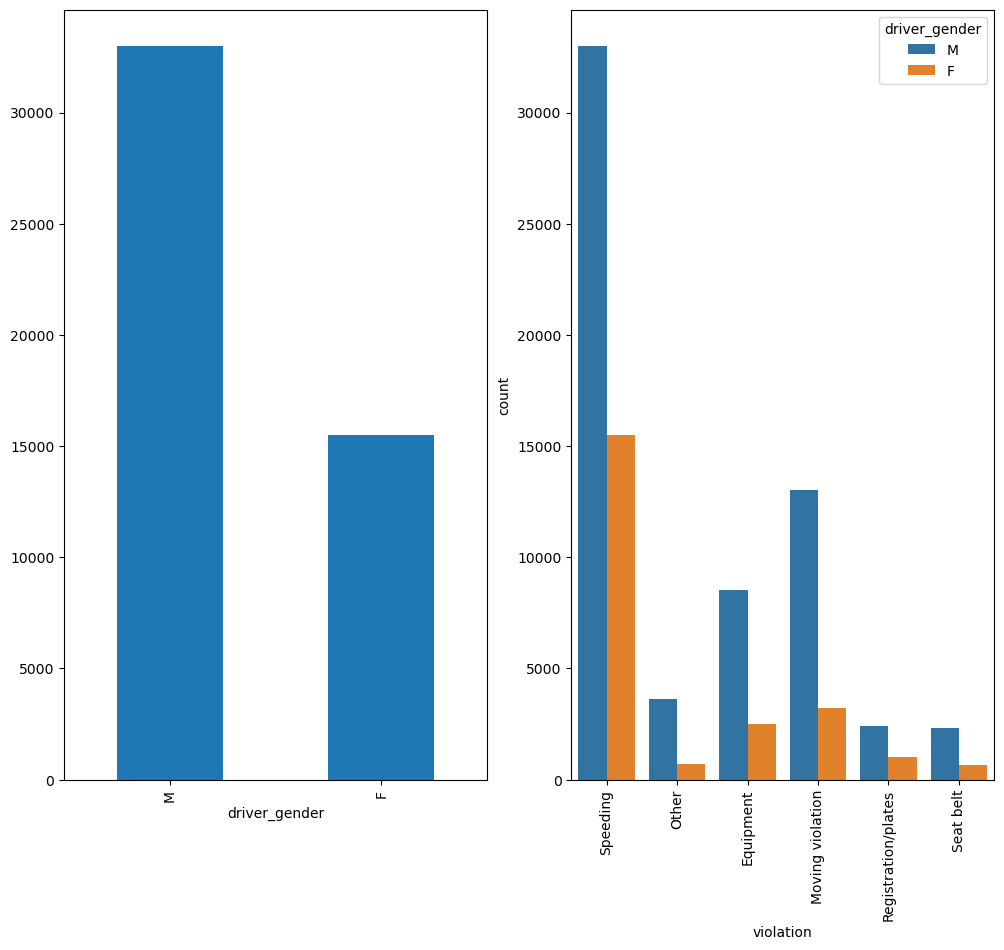

In [24]:
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)

df[df['violation'] == 'Speeding']['driver_gender'].value_counts().plot(kind='bar')

plt.subplot(1,2,2)

sns.countplot(x='violation', data=df,hue='driver_gender')

plt.xticks(rotation=90)

Text(0.5, 1.0, 'Violation of FeMale ')

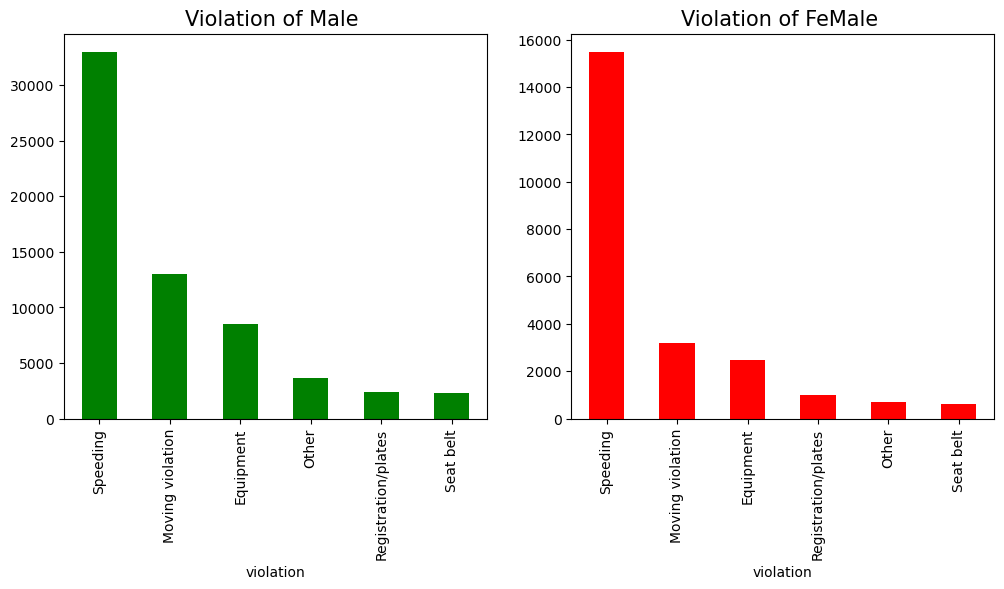

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

df[df['driver_gender'] =='M']['violation'].value_counts().plot(kind='bar',color='g')

plt.title('Violation of Male ',fontsize=15)

plt.subplot(1,2,2)

df[df['driver_gender'] =='F']['violation'].value_counts().plot(kind='bar',color='r')

plt.title('Violation of FeMale ',fontsize=15)


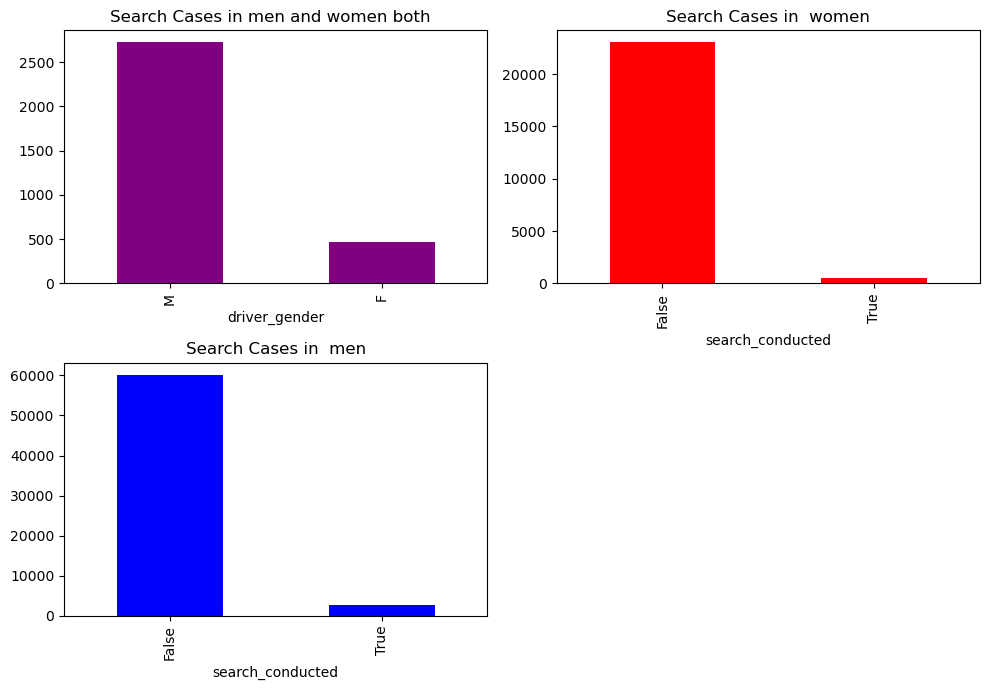

In [41]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)

df[df['search_conducted'] ==True]['driver_gender'].value_counts().plot(kind='bar',color='purple')

plt.title('Search Cases in men and women both  ',fontsize=12)


plt.subplot(2,2,2)

df[df['driver_gender'] =='F']['search_conducted'].value_counts().plot(kind='bar',color='r')

plt.title('Search Cases in  women',fontsize=12)

plt.subplot(2,2,3)

df[df['driver_gender'] =='M']['search_conducted'].value_counts().plot(kind='bar',color='b')

plt.title('Search Cases in  men',fontsize=12)

plt.tight_layout()

<Axes: xlabel='driver_age', ylabel='Count'>

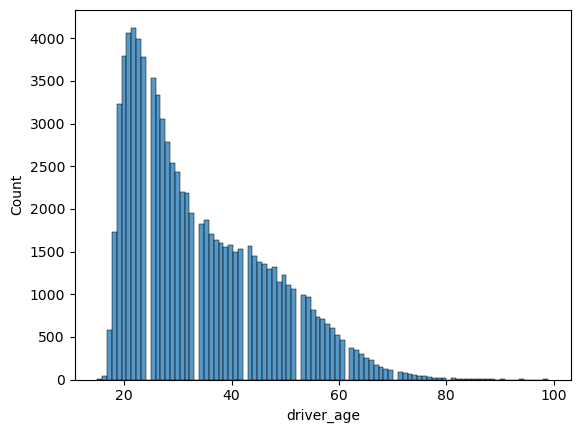

In [42]:
sns.histplot(df['driver_age'])